In [26]:
import torch
from torch import nn, optim
from jcopdl.callback import Callback, set_config

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

# Dataset & Dataloader

In [27]:
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

In [28]:
batch_size = 128

transform = transforms.Compose([
    transforms.Grayscale(),
    transforms.ToTensor()
])

train_set = datasets.ImageFolder('data/train/', transform=transform)
trainloader = DataLoader(train_set, batch_size = batch_size, shuffle=True, num_workers=2)

test_set = datasets.ImageFolder('data/test/', transform=transform)
testloader = DataLoader(test_set, batch_size = batch_size, num_workers=2)






In [29]:
images, labels = next(iter(trainloader))
images.shape

torch.Size([128, 1, 28, 28])

In [30]:
label2cat = train_set.classes
label2cat

['Ankle boot',
 'Bag',
 'Coat',
 'Dress',
 'Pullover',
 'Sandal',
 'Shirt',
 'Sneaker',
 'T-shirt or Top',
 'Trouser']

# Arsitektur

In [31]:
from jcopdl.layers import linear_block

In [43]:
class FashionClassifier(nn.Module):
    def __init__(self, input_size, output_size, n1, n2, dropout=0.2):
        super().__init__()
        self.fc = nn.Sequential(
            nn.Flatten(),
            linear_block(input_size, n1, dropout=dropout),
            linear_block(n1, n2, dropout=dropout),
            linear_block(n2, output_size, activation='lsoftmax'),
        )
        
    def forward(self, x):
        return self.fc(x)

In [44]:
config = set_config({
    'input_size': 784,
    'n1': 256,
    'n2': 64,
    'output_size':len(train_set.classes),
    'dropout': 0.2
    
    
})

# Training Preparation

In [45]:
model = FashionClassifier(config.input_size, config.n1, config.n2, config.output_size, config.dropout).to(device)
criterion = nn.NLLLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.001)
callback = Callback(model, config, outdir='model')





# Training

In [46]:
from tqdm.auto import tqdm

In [47]:
def loop_fn(mode, dataset, dataloader, model, criterion, optimizer, device):
    if mode == 'train':
        model.train()
    elif mode == 'test':
        model.eval()
    cost = correct = 0
    for feature, target in tqdm(dataloader, desc=mode.title()):
        feature, target = feature.to(device), target.to(device)
        output = model(feature)
        loss = criterion(output, target)
        
        if mode == 'train':
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()
            
        cost += loss.item() * feature.shape[0]
        correct += (output.argmax(1) == target).sum().item()
    cost = cost / len(dataset)
    acc = correct / len(dataset)
    return cost, acc      
        



Epoch     1
Train_cost  = 1.9791 | Test_cost  = 0.7594 | Train_score = 0.4471 | Test_score = 0.7528 |




Epoch     2
Train_cost  = 0.9334 | Test_cost  = 0.6090 | Train_score = 0.6660 | Test_score = 0.7825 |




Epoch     3
Train_cost  = 0.7998 | Test_cost  = 0.5443 | Train_score = 0.7066 | Test_score = 0.8112 |




Epoch     4
Train_cost  = 0.7267 | Test_cost  = 0.5084 | Train_score = 0.7341 | Test_score = 0.8222 |




Epoch     5
Train_cost  = 0.6864 | Test_cost  = 0.4764 | Train_score = 0.7525 | Test_score = 0.8350 |




Epoch     6
Train_cost  = 0.6349 | Test_cost  = 0.4486 | Train_score = 0.7732 | Test_score = 0.8407 |




Epoch     7
Train_cost  = 0.6079 | Test_cost  = 0.4419 | Train_score = 0.7829 | Test_score = 0.8417 |




Epoch     8
Train_cost  = 0.5848 | Test_cost  = 0.4205 | Train_score = 0.7911 | Test_score = 0.8491 |




Epoch     9
Train_cost  = 0.5700 | Test_cost  = 0.4153 | Train_score = 0.7961 | Test_score = 0.8518 |




Epoch    10
Train_cost  = 0.5592 | Test_cost  = 0.4065 | Train_score = 0.8011 | Test_score = 0.8533 |




Epoch    11
Train_cost  = 0.5457 | Test_cost  = 0.4023 | Train_score = 0.8026 | Test_score = 0.8590 |




Epoch    12
Train_cost  = 0.5375 | Test_cost  = 0.3955 | Train_score = 0.8035 | Test_score = 0.8623 |




Epoch    13
Train_cost  = 0.5239 | Test_cost  = 0.3928 | Train_score = 0.8110 | Test_score = 0.8624 |




Epoch    14
Train_cost  = 0.5205 | Test_cost  = 0.3917 | Train_score = 0.8135 | Test_score = 0.8592 |
==> EarlyStop patience =  1 | Best test_score: 0.8624




Epoch    15
Train_cost  = 0.5068 | Test_cost  = 0.3886 | Train_score = 0.8165 | Test_score = 0.8618 |
==> EarlyStop patience =  2 | Best test_score: 0.8624




Epoch    16
Train_cost  = 0.5031 | Test_cost  = 0.3828 | Train_score = 0.8173 | Test_score = 0.8625 |




Epoch    17
Train_cost  = 0.4958 | Test_cost  = 0.3845 | Train_score = 0.8211 | Test_score = 0.8620 |
==> EarlyStop patience =  1 | Best test_score: 0.8625




Epoch    18
Train_cost  = 0.4947 | Test_cost  = 0.3851 | Train_score = 0.8203 | Test_score = 0.8637 |




Epoch    19
Train_cost  = 0.4842 | Test_cost  = 0.3843 | Train_score = 0.8238 | Test_score = 0.8645 |




Epoch    20
Train_cost  = 0.4805 | Test_cost  = 0.3807 | Train_score = 0.8262 | Test_score = 0.8658 |


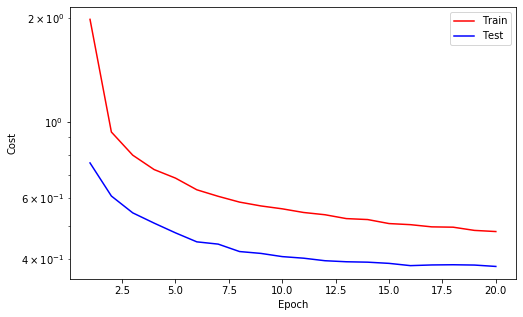

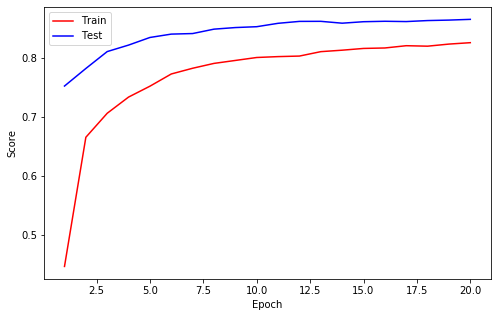



Epoch    21
Train_cost  = 0.4748 | Test_cost  = 0.3734 | Train_score = 0.8292 | Test_score = 0.8700 |




Epoch    22
Train_cost  = 0.4695 | Test_cost  = 0.3811 | Train_score = 0.8301 | Test_score = 0.8618 |
==> EarlyStop patience =  1 | Best test_score: 0.8700




Epoch    23
Train_cost  = 0.4666 | Test_cost  = 0.3744 | Train_score = 0.8319 | Test_score = 0.8662 |
==> EarlyStop patience =  2 | Best test_score: 0.8700




Epoch    24
Train_cost  = 0.4601 | Test_cost  = 0.3711 | Train_score = 0.8318 | Test_score = 0.8722 |




Epoch    25
Train_cost  = 0.4574 | Test_cost  = 0.3684 | Train_score = 0.8350 | Test_score = 0.8703 |
==> EarlyStop patience =  1 | Best test_score: 0.8722




Epoch    26
Train_cost  = 0.4511 | Test_cost  = 0.3653 | Train_score = 0.8353 | Test_score = 0.8719 |
==> EarlyStop patience =  2 | Best test_score: 0.8722




Epoch    27
Train_cost  = 0.4509 | Test_cost  = 0.3636 | Train_score = 0.8366 | Test_score = 0.8723 |




Epoch    28
Train_cost  = 0.4497 | Test_cost  = 0.3781 | Train_score = 0.8357 | Test_score = 0.8649 |
==> EarlyStop patience =  1 | Best test_score: 0.8723




Epoch    29
Train_cost  = 0.4419 | Test_cost  = 0.3696 | Train_score = 0.8387 | Test_score = 0.8702 |
==> EarlyStop patience =  2 | Best test_score: 0.8723




Epoch    30
Train_cost  = 0.4407 | Test_cost  = 0.3646 | Train_score = 0.8401 | Test_score = 0.8727 |




Epoch    31
Train_cost  = 0.4346 | Test_cost  = 0.3693 | Train_score = 0.8393 | Test_score = 0.8709 |
==> EarlyStop patience =  1 | Best test_score: 0.8727




Epoch    32
Train_cost  = 0.4366 | Test_cost  = 0.3645 | Train_score = 0.8397 | Test_score = 0.8707 |
==> EarlyStop patience =  2 | Best test_score: 0.8727




Epoch    33
Train_cost  = 0.4312 | Test_cost  = 0.3646 | Train_score = 0.8425 | Test_score = 0.8722 |
==> EarlyStop patience =  3 | Best test_score: 0.8727




Epoch    34
Train_cost  = 0.4263 | Test_cost  = 0.3653 | Train_score = 0.8436 | Test_score = 0.8734 |




Epoch    35
Train_cost  = 0.4249 | Test_cost  = 0.3610 | Train_score = 0.8438 | Test_score = 0.8748 |




Epoch    36
Train_cost  = 0.4217 | Test_cost  = 0.3645 | Train_score = 0.8440 | Test_score = 0.8716 |
==> EarlyStop patience =  1 | Best test_score: 0.8748




Epoch    37
Train_cost  = 0.4198 | Test_cost  = 0.3611 | Train_score = 0.8446 | Test_score = 0.8768 |




Epoch    38
Train_cost  = 0.4172 | Test_cost  = 0.3641 | Train_score = 0.8460 | Test_score = 0.8750 |
==> EarlyStop patience =  1 | Best test_score: 0.8768




Epoch    39
Train_cost  = 0.4151 | Test_cost  = 0.3615 | Train_score = 0.8448 | Test_score = 0.8735 |
==> EarlyStop patience =  2 | Best test_score: 0.8768




Epoch    40
Train_cost  = 0.4095 | Test_cost  = 0.3619 | Train_score = 0.8473 | Test_score = 0.8738 |


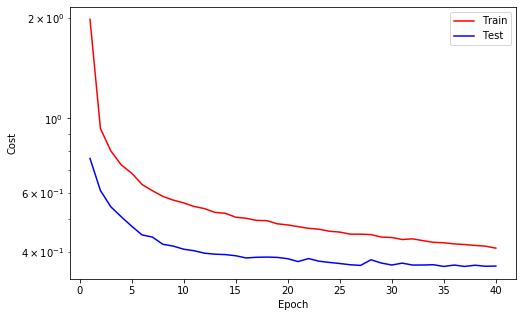

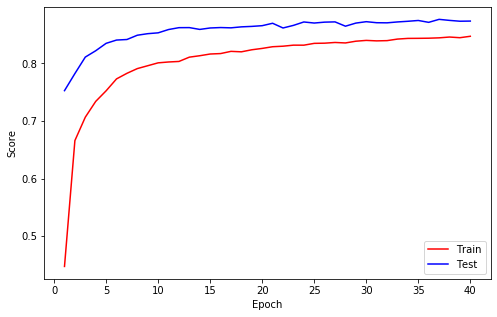

==> EarlyStop patience =  3 | Best test_score: 0.8768




Epoch    41
Train_cost  = 0.4126 | Test_cost  = 0.3649 | Train_score = 0.8462 | Test_score = 0.8729 |
==> EarlyStop patience =  4 | Best test_score: 0.8768




Epoch    42
Train_cost  = 0.4148 | Test_cost  = 0.3595 | Train_score = 0.8481 | Test_score = 0.8777 |




Epoch    43
Train_cost  = 0.4075 | Test_cost  = 0.3612 | Train_score = 0.8516 | Test_score = 0.8783 |




Epoch    44
Train_cost  = 0.4055 | Test_cost  = 0.3656 | Train_score = 0.8516 | Test_score = 0.8738 |
==> EarlyStop patience =  1 | Best test_score: 0.8783




Epoch    45
Train_cost  = 0.4051 | Test_cost  = 0.3673 | Train_score = 0.8504 | Test_score = 0.8736 |
==> EarlyStop patience =  2 | Best test_score: 0.8783




Epoch    46
Train_cost  = 0.3981 | Test_cost  = 0.3711 | Train_score = 0.8545 | Test_score = 0.8743 |
==> EarlyStop patience =  3 | Best test_score: 0.8783




Epoch    47
Train_cost  = 0.4027 | Test_cost  = 0.3660 | Train_score = 0.8508 | Test_score = 0.8757 |
==> EarlyStop patience =  4 | Best test_score: 0.8783




Epoch    48
Train_cost  = 0.3989 | Test_cost  = 0.3808 | Train_score = 0.8537 | Test_score = 0.8718 |
==> EarlyStop patience =  5 | Best test_score: 0.8783
==> Execute Early Stopping at epoch: 48 | Best test_score: 0.8783
==> Best model is saved at model


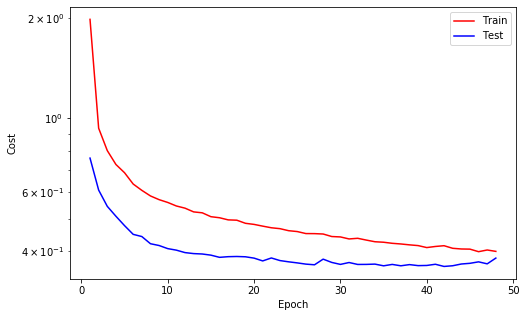

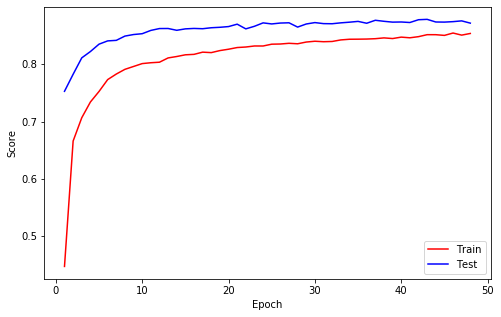

In [48]:
while True:
    train_cost, train_score = loop_fn('train', train_set, trainloader, model, criterion, optimizer, device)
    with torch.no_grad():
        test_cost, test_score = loop_fn('test', test_set, testloader, model, criterion, optimizer, device)
        
        
    # feature Logging
    callback.log(train_cost, test_cost, train_score, test_score)
    
    # Safe Checkpoint
    callback.save_checkpoint()
    
    # Runtime Plotting
    callback.cost_runtime_plotting()
    callback.score_runtime_plotting()
    
    # Early Stopping
    if callback.early_stopping(model, monitor='test_score'):
        callback.plot_cost()
        callback.plot_score()
        break
    

# Model Evaluation

In [49]:
model

FashionClassifier(
  (fc): Sequential(
    (0): Flatten()
    (1): Sequential(
      (0): Linear(in_features=784, out_features=64, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (2): Sequential(
      (0): Linear(in_features=64, out_features=10, bias=True)
      (1): ReLU()
      (2): Dropout(p=0.2, inplace=False)
    )
    (3): Sequential(
      (0): Linear(in_features=10, out_features=256, bias=True)
      (1): LogSoftmax()
    )
  )
)

# Predict

In [53]:
import matplotlib.pyplot as plt

In [50]:
feature, target = next(iter(testloader))
feature, target = feature.to(device), target.to(device)

In [51]:
with torch.no_grad():
    model.eval()
    output = model(feature)
    preds = output.argmax(1)

preds

tensor([0, 7, 0, 0, 7, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0, 0, 0, 7, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 7, 0, 5, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0])

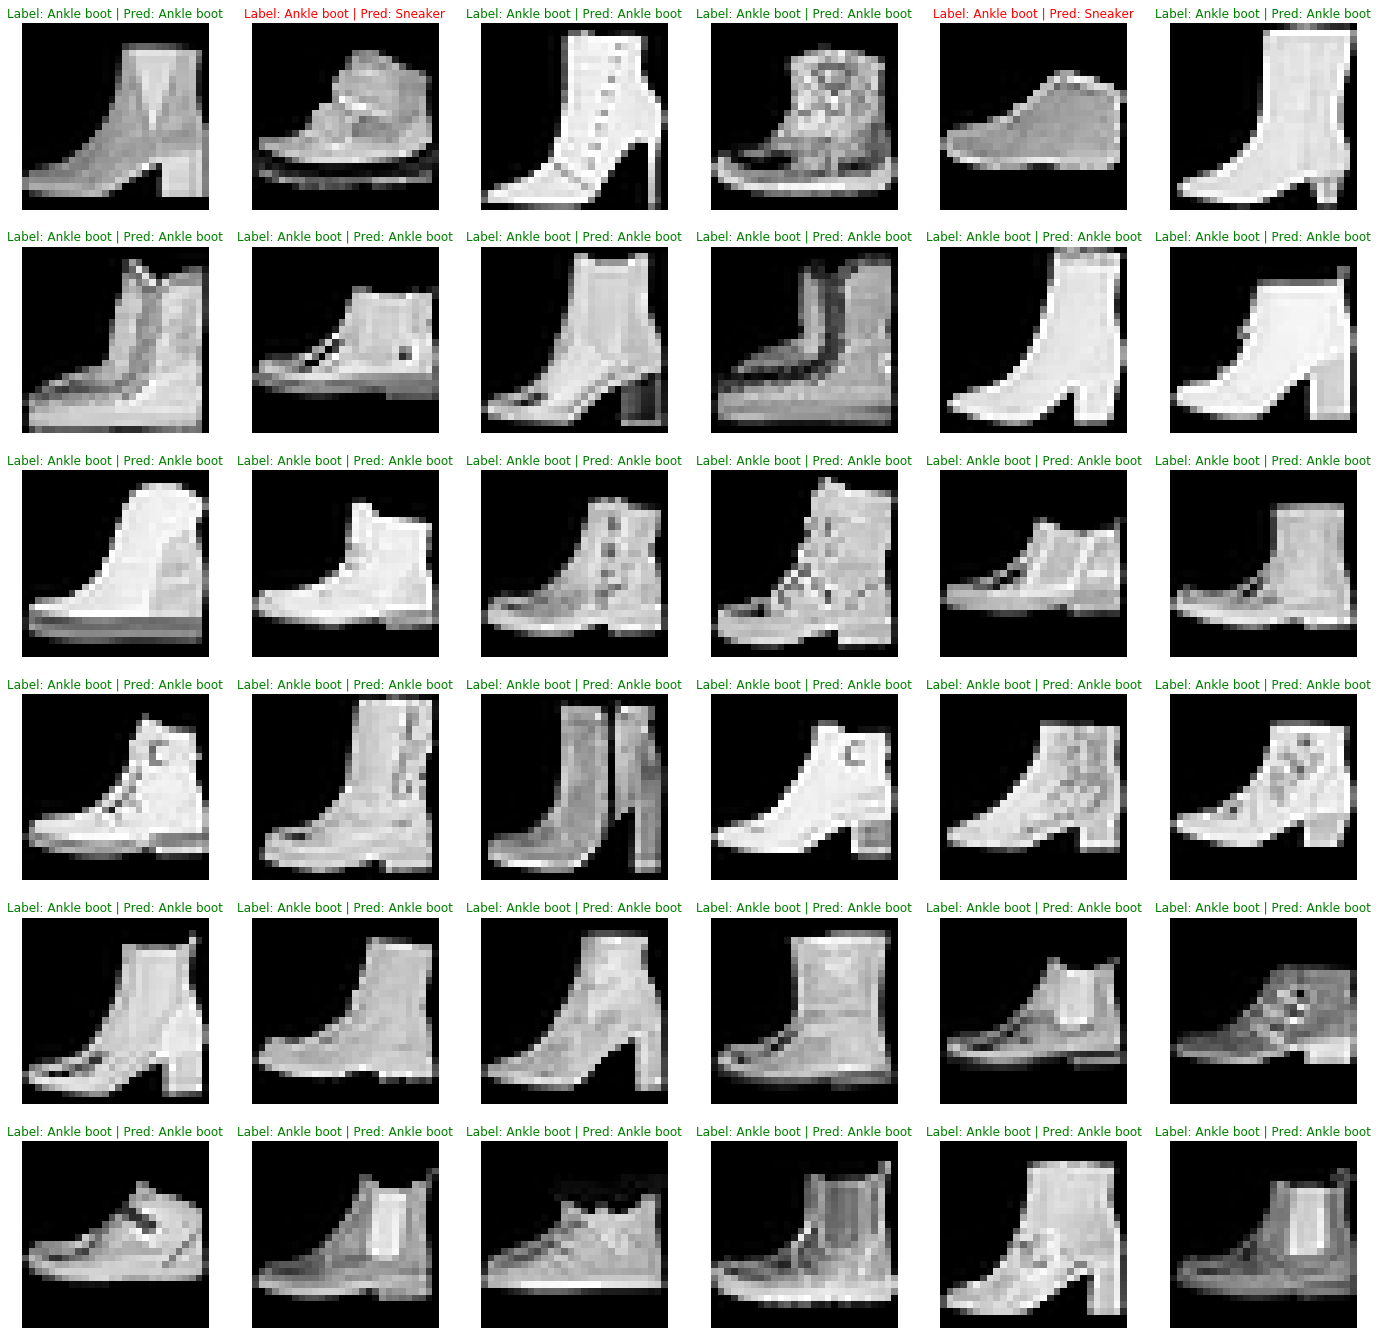

In [63]:
fig, axes = plt.subplots(6, 6, figsize=(24, 24))
for img, label, pred, ax in zip(feature, target, preds, axes.flatten()):
    ax.imshow(img.view(28,28).cpu(), cmap='gray')
    font = {'color': 'r'} if label != pred else {'color': 'g'}
    label, pred = label2cat[label.item()], label2cat[pred.item()]
    ax.set_title(f'Label: {label} | Pred: {pred}', fontdict=font);
    ax.axis('off');